In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import json

# Base directory for dataset
base_dir = '/kaggle/input/plant-village-dataset-updated'

# Load datasets with inferred class labels
train_set = tf.keras.utils.image_dataset_from_directory(
    base_dir,  # Adjust this to your directory structure
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    subset="training",
    validation_split=0.2,
    seed=123
)

val_set = tf.keras.utils.image_dataset_from_directory(
    base_dir,  # Adjust this to your directory structure
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    subset="validation",
    validation_split=0.2,
    seed=123
)

Found 67118 files belonging to 9 classes.
Using 53695 files for training.
Found 67118 files belonging to 9 classes.
Using 13423 files for validation.


In [5]:
# AlexNet architecture
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

alexnet = tf.keras.models.Sequential()

# First Convolutional Layer
alexnet.add(Conv2D(filters=96, kernel_size=11, strides=4, padding='valid', activation='relu', input_shape=[128, 128, 3]))

# Second Convolutional Layer
alexnet.add(Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))

# Max Pooling Layer
alexnet.add(MaxPooling2D(pool_size=3, strides=2))

# Third Convolutional Layer
alexnet.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))

# Fourth Convolutional Layer
alexnet.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))

# Fifth Convolutional Layer
alexnet.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))

# Max Pooling Layer
alexnet.add(MaxPooling2D(pool_size=3, strides=2))

# Flatten the output
alexnet.add(Flatten())

# Fully Connected Layer
alexnet.add(Dense(units=4096, activation='relu'))

# Dropout layer to avoid overfitting
alexnet.add(Dropout(0.5))

# Second Fully Connected Layer
alexnet.add(Dense(units=4096, activation='relu'))

# Dropout layer to avoid overfitting
alexnet.add(Dropout(0.5))

# Output layer with 38 classes for plant diseases
alexnet.add(Dense(units=9, activation='softmax'))

# Compile the model
alexnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
alexnet.summary()

# Ensure correct data format: Iterate over the dataset to check shapes
for images, labels in train_set.take(1):  # Get a single batch
    print(images.shape)  # Expected shape should be (32, 128, 128, 3)
    print(labels.shape)  # Expected shape should be (32, 38)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │          36,873 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,318,217 (222.47 MB)

 Trainable params: 58,318,217 (222.47 MB)

 Non-trainable params: 0 (0.00 B)

(32, 128, 128, 3)
(32, 9)


In [6]:
# Training the model
history = alexnet.fit(train_set, validation_data=val_set, epochs=10)

# Save the model and training history
alexnet.save('/kaggle/working/alexnet_dataset2.keras')
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)


Epoch 1/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 176s 98ms/step - accuracy: 0.5706 - loss: 1.5024 - val_accuracy: 0.8900 - val_loss: 0.3286
Epoch 2/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 96s 57ms/step - accuracy: 0.8797 - loss: 0.3586 - val_accuracy: 0.9372 - val_loss: 0.1907
Epoch 3/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 96s 57ms/step - accuracy: 0.9289 - loss: 0.2112 - val_accuracy: 0.9378 - val_loss: 0.1962
Epoch 4/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 96s 57ms/step - accuracy: 0.9496 - loss: 0.1526 - val_accuracy: 0.9441 - val_loss: 0.1790
Epoch 5/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 95s 57ms/step - accuracy: 0.9610 - loss: 0.1148 - val_accuracy: 0.9442 - val_loss: 0.1859
Epoch 6/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 95s 57ms/step - accuracy: 0.9714 - loss: 0.0850 - val_accuracy: 0.9582 - val_loss: 0.1418
Epoch 7/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 95s 56ms/step - accuracy: 0.9742 - loss: 0.0794 - val_accuracy: 0.9601 - val_loss: 0.1350
Epoch 8/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 95s 56ms/step - accuracy: 0.9765 

NameError: name 'model' is not defined

In [7]:
# Evaluate the model on the validation set
test_loss, test_acc = alexnet.evaluate(val_set)
print(f"Test Accuracy: {test_acc*100:.2f}%")

420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9686 - loss: 0.1076
Test Accuracy: 96.71%


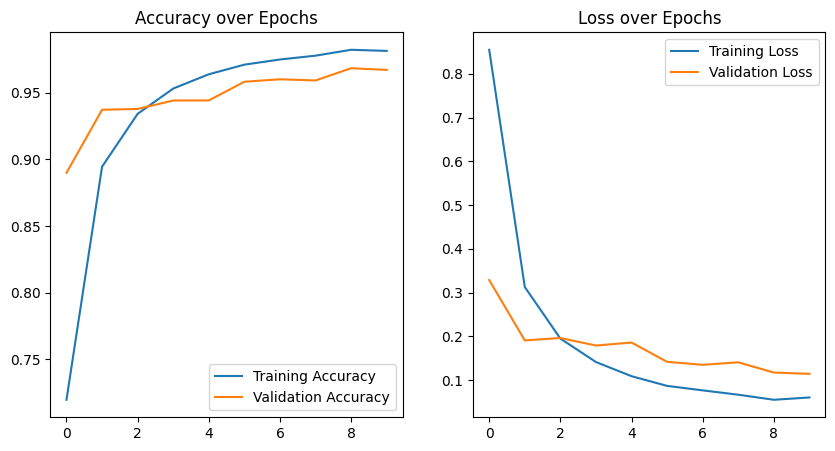

In [8]:
# Plotting training results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [9]:
# Test set prediction using base_dir (inferred test set)
test_set = tf.keras.utils.image_dataset_from_directory(
    base_dir,  # Replace with the correct test path inside base_dir
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=123
)

# Predicting with the trained model on the test set
y_pred = alexnet.predict(test_set)

# Convert predictions to class labels (using argmax)
predicted_categories = tf.argmax(y_pred, axis=1)

# Print predicted categories
print(f"Predicted Categories: {predicted_categories.numpy()}")

Found 67118 files belonging to 9 classes.
67118/67118 ━━━━━━━━━━━━━━━━━━━━ 155s 2ms/step
Predicted Categories: [0 0 0 ... 8 8 8]
